# VGG Net 응용

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [18]:
vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving 고양이.jpg to 고양이 (1).jpg


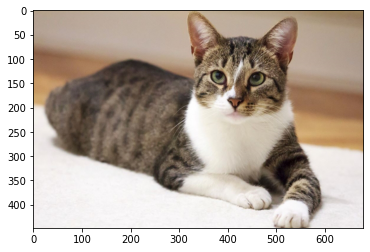

In [20]:
img = Image.open('고양이.jpg')
plt.imshow(img);

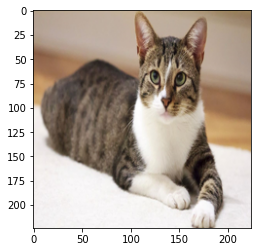

In [21]:
img = img.resize((224,224))
plt.imshow(img);

- 이미지 예측

In [22]:
yhat = vgg16.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.5787119),
   ('n02123045', 'tabby', 0.32011363),
   ('n02123159', 'tiger_cat', 0.09854775),
   ('n04040759', 'radiator', 0.00047500033),
   ('n02127052', 'lynx', 0.0004513398)]])

- 이미지를 중앙으로 위치하여 자르기

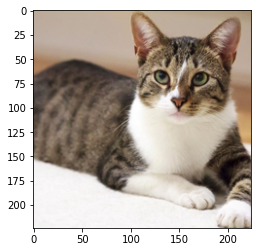

In [23]:
from image_util import center_image
img = Image.open('고양이.jpg')
img = center_image(img, src_format='Pillow', dst_format='Pillow')
plt.imshow(img);

In [24]:
yhat = vgg16.predict(np.array(img).reshape(1,224,224,3))
label = decode_predictions(yhat)
label

[[('n02123045', 'tabby', 0.56074995),
  ('n02124075', 'Egyptian_cat', 0.28903002),
  ('n02123159', 'tiger_cat', 0.14672886),
  ('n02127052', 'lynx', 0.0009287954),
  ('n04040759', 'radiator', 0.00053233525)]]